In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/age-fare-missing/age_fare_missing.csv


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [17]:
df=pd.read_csv('/kaggle/input/age-fare-missing/age_fare_missing.csv')

In [18]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Age,Fare
0,22.0,7.25
1,38.0,71.83
2,NaN,8.05
3,35.0,NaN
4,NaN,8.46


In [19]:
df.isnull().mean()

Age     0.3
Fare    0.3
dtype: float64

In [20]:
X=df.drop(columns=['Fare'])
Y=df['Fare']

In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [22]:
X_train.shape,X_test.shape

((8, 1), (2, 1))

In [23]:
X_train.isnull().mean()

Age    0.25
dtype: float64

In [24]:
mean_age=X_train['Age'].mean()
median_age=X_train['Age'].median()

In [25]:
X_train['Age_median']=X_train['Age'].fillna(median_age)
X_train['Age_mean']=X_train['Age'].fillna(mean_age)

In [26]:
X_train.sample(5)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Age,Age_median,Age_mean
0,22.0,22.0,22.0
7,NaN,24.5,26.5
9,19.0,19.0,19.0
2,NaN,24.5,26.5
5,54.0,54.0,54.0


In [27]:
print("Original  Age variable variance:",X_train['Age'].var())
print("Age Variance after median imputation:",X_train['Age_median'].var())
print("Age  Variance after mean imputation:",X_train['Age_mean'].var())

Original  Age variable variance: 301.1
Age Variance after median imputation: 215.92857142857142
Age  Variance after mean imputation: 215.07142857142858


NameError: name 'labels' is not defined

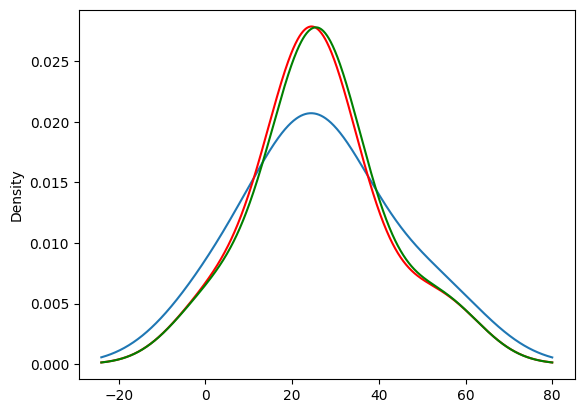

In [28]:
fig =plt.figure()
ax=fig.add_subplot(111)

X_train['Age'].plot(kind='kde',ax=ax)

X_train['Age_median'].plot(kind='kde',ax=ax,color='red')

X_train['Age_mean'].plot(kind='kde',ax=ax,color='green')

lines,lables=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [29]:
X_train .cov()

,Age,Age_median,Age_mean
Age,301.1,301.100000,301.100000
Age_median,301.1,215.928571,215.071429
Age_mean,301.1,215.071429,215.071429


In [30]:
X_train.corr()

,Age,Age_median,Age_mean
Age,1.0,1.000000,1.000000
Age_median,1.0,1.000000,0.998013
Age_mean,1.0,0.998013,1.000000
